In [5]:
#import
#region
import matplotlib.pyplot as plt
import math
#endregion


#input and output
#region
inputPath_1 = 'example1.txt'
inputPath_2 = 'example2.txt'

outputPath_1 = 'outputPath_1.txt'

#endregion


# some stuff
#region
empty = lambda s: s != ''

def Show():
    return 0

def validate():

    return 1

#endregion


#read input
#region
def ReadArray(f):
    line = f.readline()
    result = list(map(float, list(filter(empty,line.split(' ')))))
    return result

def ReadMatrix(f):
    listCoef = []
    line = f.readline()
    while(line.strip() != ''):
        coef = list(map(float,list(filter(empty,line.split(' ')))))
        listCoef.append(coef)
        line = f.readline()
    #print('listCoef: ')
    #print(listCoef)
    return listCoef

def RandN(listCoef):
        # R & N
    R = listCoef[0][0]
    N = math.inf
    for coef in listCoef:
        if(R > coef[0]): R = coef[0]
        coef.pop(0)
        if(N > len(coef)): N = len(coef)
    if R <= 0:
        raise ValueError("invalid input: bán kính <= 0")
    
    #print(listCoef)
    #print("bán kính hội tụ: ", end =''); print(R)
    #print("bậc tối đa sẽ tìm của t: ", end = ''); print(N)
    return (R,N)

#endregion


#main loop
def calculate(initial, listCoef, N):
    result = initial            # mảng kết quả c_i
    k=len(listCoef)             # mảng mảng hệ số a_i
    for n in range(0,N-k):
        c=0
        #start calculating c_{n+k}
        for m in range(0,n+1):
            mult = 1
            for i in range(0,k):
                c+=listCoef[i][n-m] * result[m+i] * mult
                mult *= m+i+1
        offset = 1;
        for i in range(n+1,n+k+1): offset *= i
        c= -c/offset           # -1*n! / (n+k)!
        result.append(c)
    return result


#Program
def Polynomial(inputPath):
    f = open(inputPath,"r")
    initial = ReadArray(f)
    listCoef = ReadMatrix(f)
    f.close()
    R,N = RandN(listCoef)
    result = calculate(initial, listCoef, N)
    return (R, result)


# file working
#region
def Save(result, outputPath, mode):
    f = open(outputPath, mode)
    f.write("Radius of convergence = " + str(result[0]) + ", Result: \n");
    f.write(str(result[1]))
    f.close()

#endregion

#plot
#region
def Plot(result, start, end):
    from sympy.plotting import plot
    from sympy import symbols, Function
    x = symbols('x')
    f = symbols('f', cls=Function)
    f = 0
    power = 0
    for i in result:
        f += i * (x ** power)
        power += 1
    plot((f, (x, start, end)))

#endregion

#Frobenius




Radius of convergence = 1.0, Result: 

[-1.0, 1.0, 0.0, 1.0, -0.16666666666666666, -0.0]


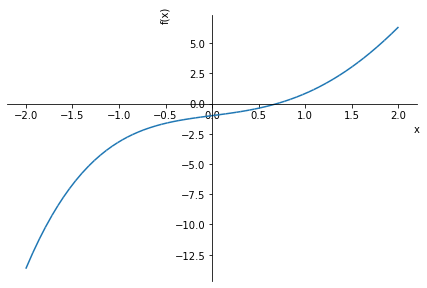

In [6]:
result = Polynomial(inputPath_1)
print("Radius of convergence = " + str(result[0]) + ", Result: \n")
resultArray = result[1]
print(resultArray)

Plot(resultArray, -2 , 2)
Save(result,outputPath_1,"w")

#endregion


In [6]:
"1  2    3   ???".split(' ')

['1', '', '2', '', '', '', '3', '', '', '???']